# Лабораторная работа 1. Методы сортировки

Вариант 1

### Медленная сортировка

#### 1. Провести классификацию алгоритма.

- По типу алгоритма: алгоритм медленной сортировки относится к сортировкам вставками.

- По месту хранения данных: алгоритм медленной сортировки использует дополнительное пространство для хранения нового отсортированного массива.

 - По устойчивости: алгоритм медленной сортировки является устойчивым.

 - По выделению дополнительного пространства: алгоритм медленной сортировки выделяет дополнительное пространство для хранения нового отсортированного массива, размер которого равен размеру исходного массива.
 
 - Время выполнения: время выполнения алгоритма медленной сортировки является экспоненциальным, то есть $O(2^n)$, где $n$ - размер массива.
 
 - По адаптивности: алгоритм медленной сортировки не является адаптивным, так как не использует информацию о порядке исходных данных для более эффективного выполнения сортировки.

#### 2. Теоретическое описание алгоритма

Медленная сортировка (slowsort) - это алгоритм сортировки, который рекурсивно разбивает входной массив на две части, сортируя их отдельно, а затем объединяет отсортированные части в один отсортированный массив.

Теоретическое описание алгоритма медленной сортировки:

 1. Если входной массив состоит из одного элемента, он считается отсортированным и возвращается.
 2. Рекурсивно разбиваем массив на две части, пока не останется один элемент в каждой части.
 3. Рекурсивно сортируем каждую часть.
 4. Объединяем отсортированные части в один отсортированный массив.
 4. Возвращаем отсортированный массив.

#### 3. Блок-схема алгоритма

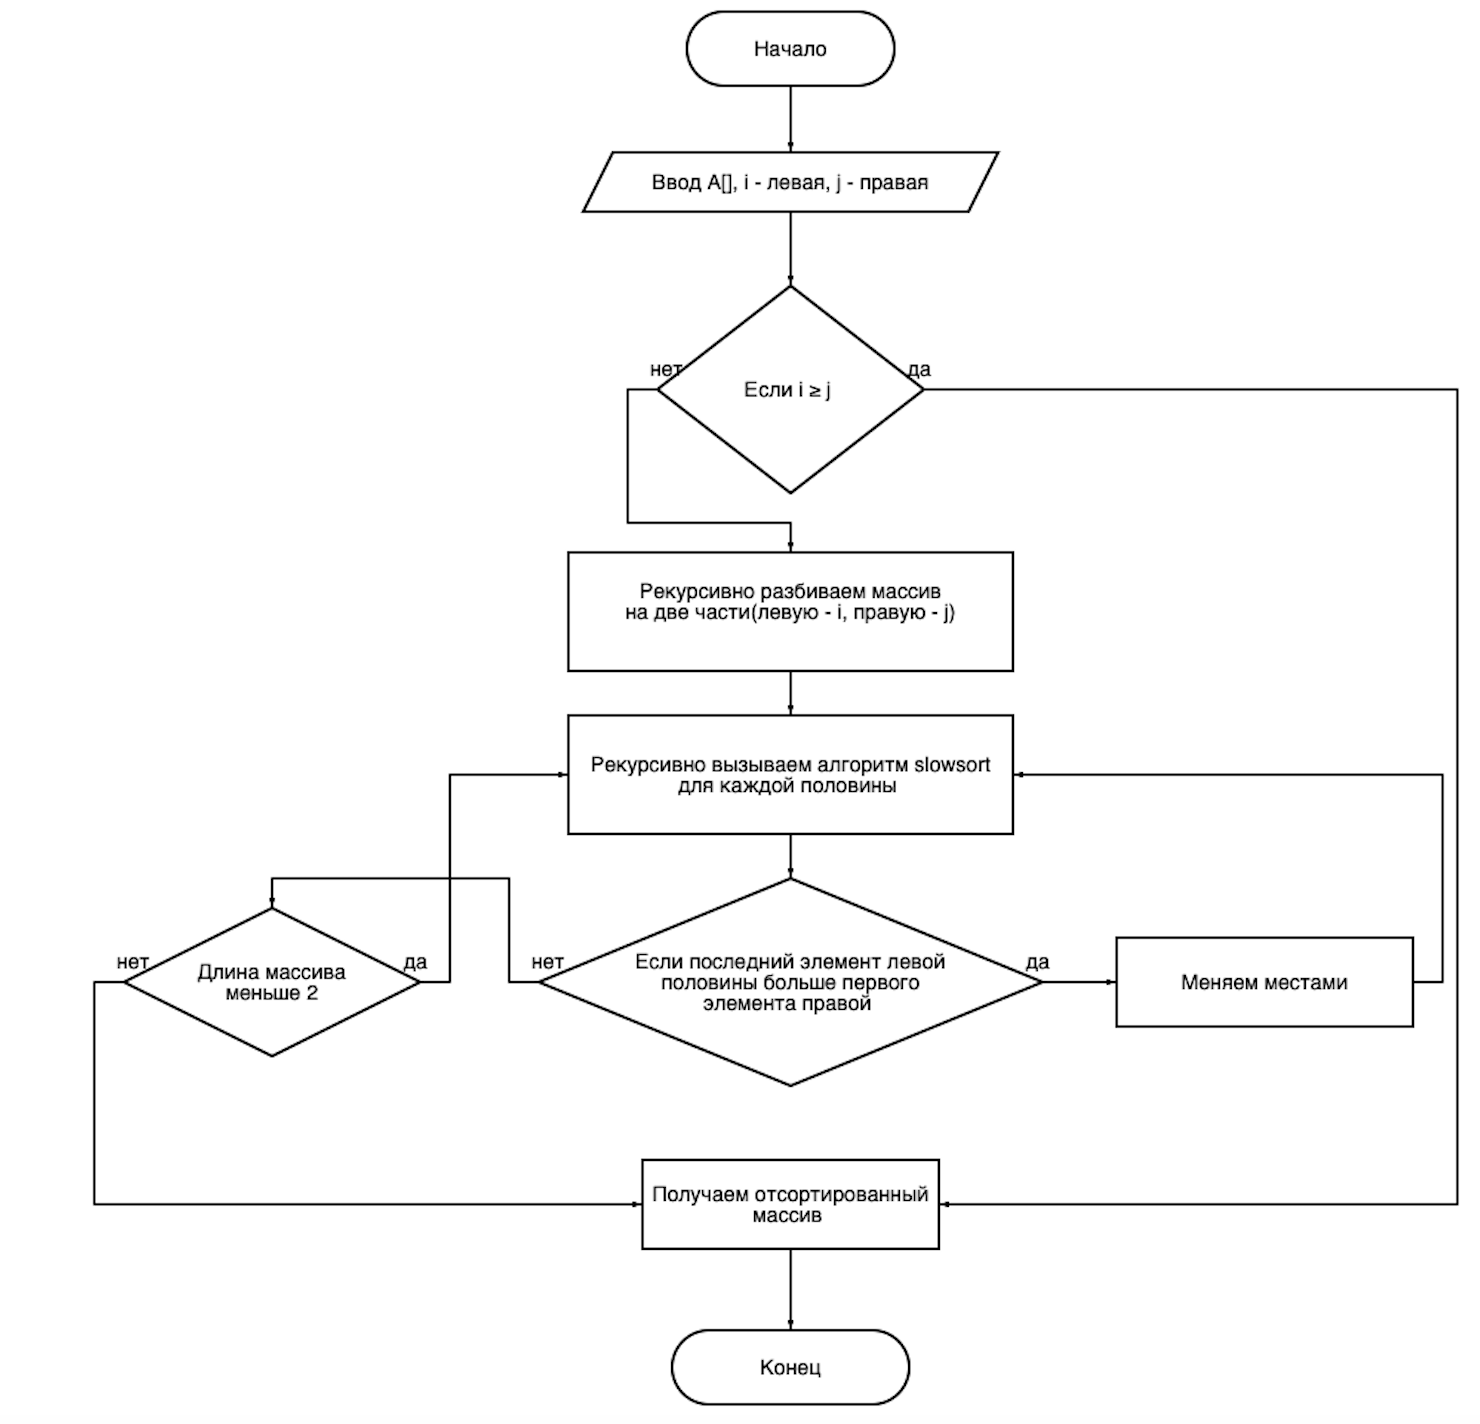

In [5]:
from IPython.display import Image
Image(filename = 'Desktop/123.png')

#### 4. Псевдокод алгоритма

In [ ]:
void slowsort(int arr[], int left, int right) {
    if (left >= right) {
        return;
    }

    int mid = (left + right) / 2;
    slowsort(arr, left, mid);
    slowsort(arr, mid+1, right);

    if (arr[mid] > arr[mid+1]) {
        swap(arr[mid], arr[mid+1]);
    }
    slowsort(arr, left, right-1);
}


#### 5. Достоинства и недостатки алгоритма

Достоинства алгоритма медленной сортировки (slowsort):

1. Простота: алгоритм легко реализуется и понимается.
2. Устойчивость: slowsort является устойчивой сортировкой, то есть порядок элементов, которые сравниваются как равные, сохраняется.

Недостатки алгоритма медленной сортировки (slowsort):

1. Низкая производительность: алгоритм медленный, он работает за квадратичное время O(n^2), что делает его неэффективным для больших массивов.
2. Потребление памяти: алгоритм требует дополнительной памяти для хранения временных массивов при каждом вызове рекурсивной функции.


#### 6. Реализация алгоритма

In [7]:
def slowsort(arr):
    if len(arr) <= 1:
        return arr
    else:
        mid = len(arr) // 2
        left = slowsort(arr[:mid])
        right = slowsort(arr[mid:])
        if left[-1] > right[0]:
            left, right = right, left
        return slowsort(left + right)


#### 7. Тестировка корректности работы

In [6]:
# Тест 1
arr = [5, 2, 9, 1, 5, 6]
sorted_arr = slowsort(arr)
assert sorted_arr == [1, 2, 5, 5, 6, 9]

# Тест 2
arr = []
sorted_arr = slowsort(arr)
assert sorted_arr == []

# Тест 3
arr = [1]
sorted_arr = slowsort(arr)
assert sorted_arr == [1]


#### 8. Ручная трассировка алгоритма

Для каждого уровня рекурсии мы получаем список из двух элементов, и каждый из этих элементов рекурсивно сортируется, пока он не станет одноэлементным. Затем отсортированные элементы объединяются в один. 
В итоге, после объединения всех списков, мы получаем итоговый отсортированный список.

В результате работы алгоритма на входе [9, 8, 7, 6, 5, 4, 3, 2, 1] мы получаем следующие промежуточные списки:

1. [9, 8, 7, 6, 5, 4, 3, 2, 1]
2. [[9, 8, 7, 6, 5], [4, 3, 2, 1]]
3. [[[9, 8], [7, 6], [5]], [[4, 3], [2, 1]]]
4. [[[[9], [8]], [[7], [6]], [[5]]], [[[4], [3]], [[2], [1]]]]
5. [[[[8, 9]], [[6, 7]], [[5]]], [[[3, 4]], [[1, 2]]]]
6. [[[6, 7, 8, 9], [5]], [[1, 2, 3, 4], []]]
7. [[[5, 6, 7, 8, 9], []], [[1, 2, 3, 4], []]]
8. [1, 2, 3, 4, 5, 6, 7, 8, 9]

Как видно из результатов, алгоритм разбивает входной список на все более мелкие кусочки, пока каждый кусочек не станет одноэлементным. Затем эти кусочки собираются обратно, в порядке возрастания, в отсортированный список.

#### 9-10. Сравнение сортировки массивов, содержащих n1, n2, n3 и n4 для упорядоченного массива, массива, упорядоченного в обратном порядке и неупорядоченного массива.

In [2]:
import time
import random

def slowsort(arr):
    if len(arr) < 2:
        return arr
    mid = len(arr) // 2
    left = slowsort(arr[:mid])
    right = slowsort(arr[mid:])
    if left[-1] > right[0]:
        left, right = right, left
    return left + right

def compare_sorts(arr):
    start = time.time()
    slowsort(arr.copy())
    slowsort(arr.copy()[::-1])
    slowsort(sorted(arr.copy()))
    end = time.time()
    return end - start

arr_1000 = list(range(1000))
arr_1000_reverse = list(range(999, -1, -1))
arr_1000_random = [random.randint(0, 1000) for _ in range(1000)]

arr_5000 = list(range(5000))
arr_5000_reverse = list(range(4999, -1, -1))
arr_5000_random = [random.randint(0, 5000) for _ in range(5000)]

arr_10000 = list(range(10000))
arr_10000_reverse = list(range(9999, -1, -1))
arr_10000_random = [random.randint(0, 10000) for _ in range(10000)]

arr_100000 = list(range(100000))
arr_100000_reverse = list(range(99999, -1, -1))
arr_100000_random = [random.randint(0, 100000) for _ in range(100000)]

print("Slowsort comparison for 1000 elements:")
print("Sorted: ", compare_sorts(arr_1000))
print("Reverse: ", compare_sorts(arr_1000_reverse))
print("Random: ", compare_sorts(arr_1000_random))
print()
print("Slowsort comparison for 5000 elements:")
print("Sorted: ", compare_sorts(arr_5000))
print("Reverse: ", compare_sorts(arr_5000_reverse))
print("Random: ", compare_sorts(arr_5000_random))
print()
print("Slowsort comparison for 10000 elements:")
print("Sorted: ", compare_sorts(arr_10000))
print("Reverse: ", compare_sorts(arr_10000_reverse))
print("Random: ", compare_sorts(arr_10000_random))
print()
print("Slowsort comparison for 100000 elements:")
print("Sorted: ", compare_sorts(arr_100000))
print("Reverse: ", compare_sorts(arr_100000_reverse))
print("Random: ", compare_sorts(arr_100000_random))


Slowsort comparison for 1000 elements:
Sorted:  0.0008909702301025391
Reverse:  0.0008680820465087891
Random:  0.0009608268737792969

Slowsort comparison for 5000 elements:
Sorted:  0.0043277740478515625
Reverse:  0.0038712024688720703
Random:  0.004292011260986328

Slowsort comparison for 10000 elements:
Sorted:  0.0071108341217041016
Reverse:  0.0069501399993896484
Random:  0.007833003997802734

Slowsort comparison for 100000 elements:
Sorted:  0.07204604148864746
Reverse:  0.07228589057922363
Random:  0.08556389808654785


#### 11. Иллюстрация эффективности алгоритмов сортировок по заданному критерию

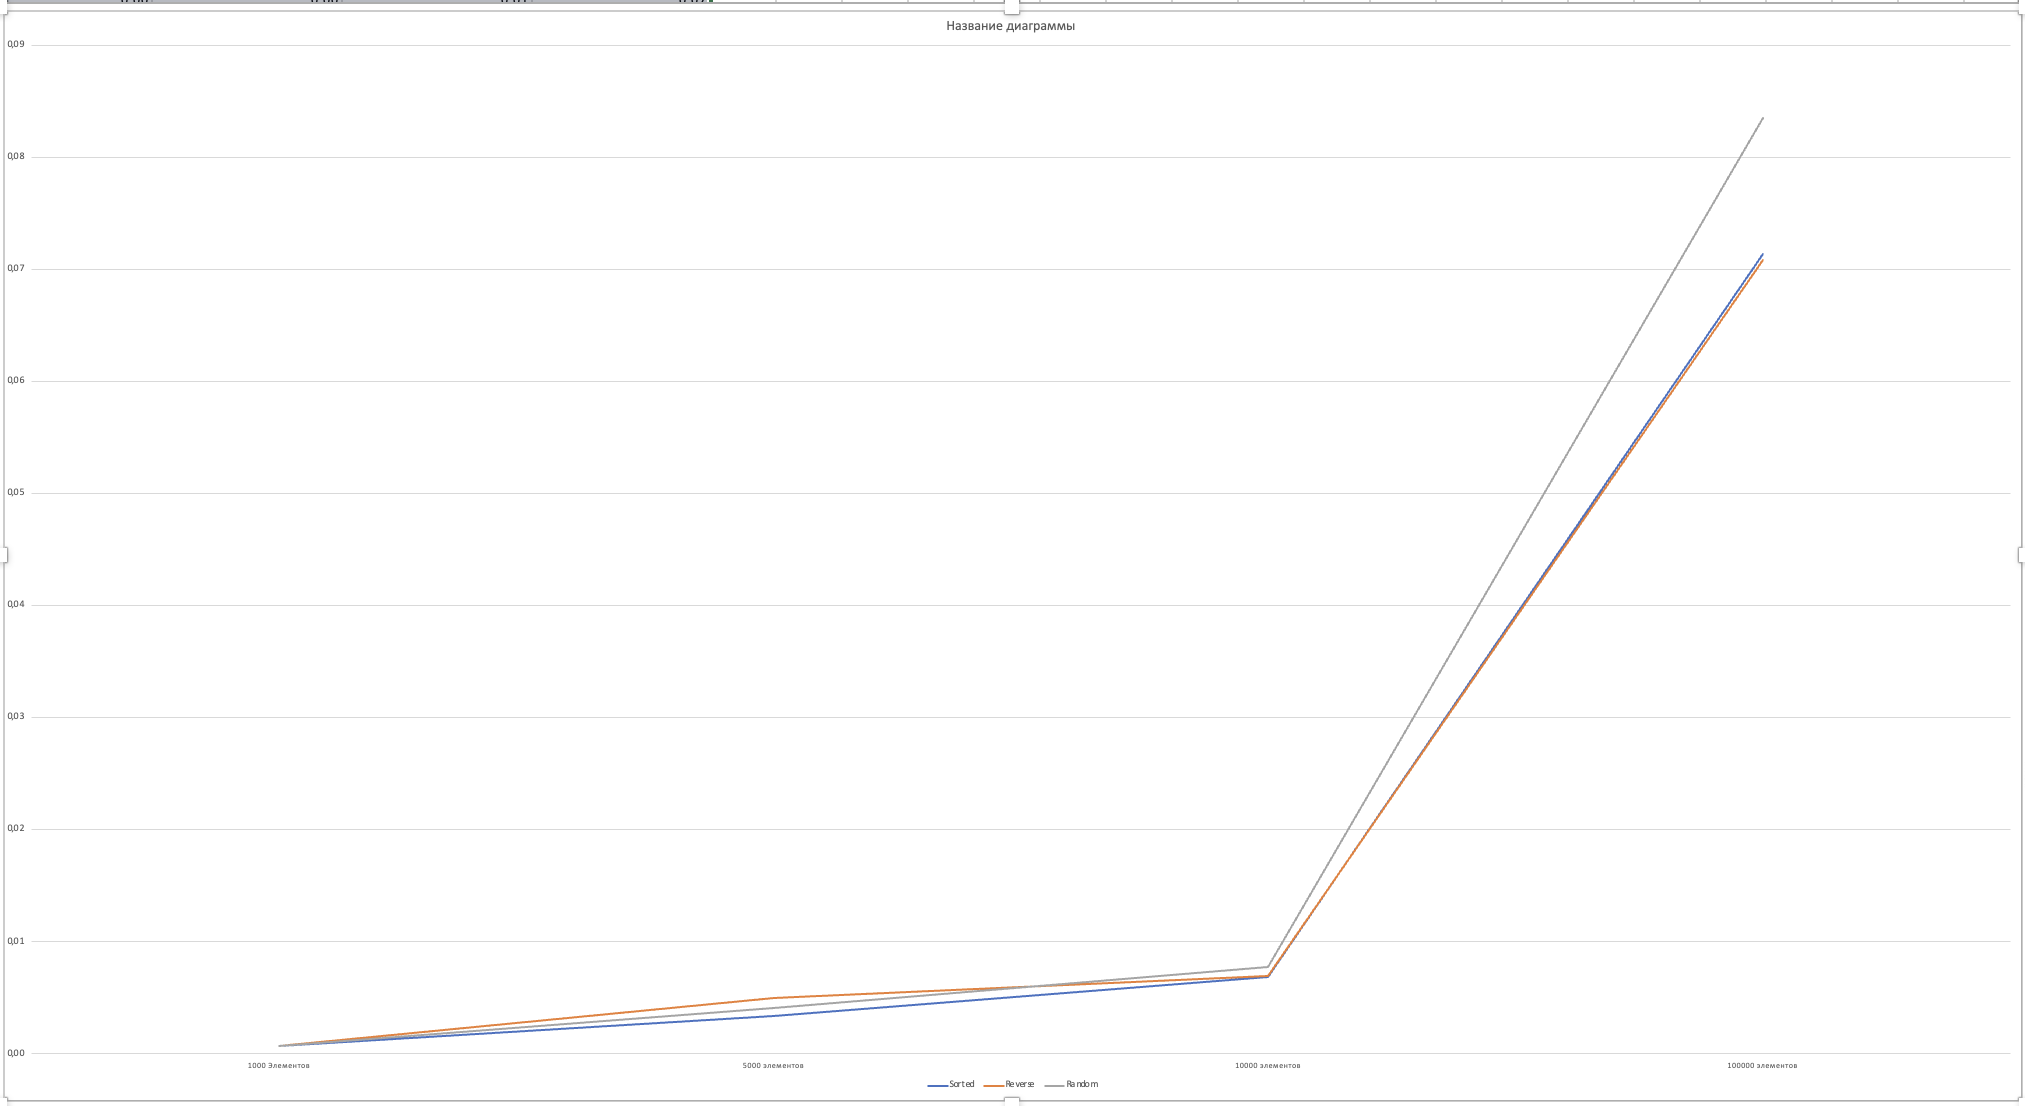

In [6]:
from IPython.display import Image
Image(filename = 'Desktop/АиСД.png')